# Raman Spectroscopy Notebook - ASU YargerLab

*March 14, 2025*

Jeff Yarger (jyarger@proton.me)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)
[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com)


# Introduction
A Google CoLaboratory (CoLab) ([Jupyter Notebook](https://jupyter.org/)) notebook for working with Raman data collected using the home-built Raman microscope system in PSB40 at Arizona State University (ASU). This Raman was recently upgraded with a new Kymera spectrometer and detector (iDus DU420A-BEX2-DD).  Here we are running some basic tests on the new Raman spectrometer.

## Raman Spectrometer and Images

Images of the iDus camera and key specs.

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_Kymera328i_iDus_Back_2025.jpeg?raw=true" width="400" alt="iDus back" />

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_Kymera328i_iDus_Top_2025.jpeg?raw=true" width="300" alt="iDus Top" />

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_iDus_DU420ABEX2DD_Key_Specs.png?raw=true" width="400" alt="iDus Key Specs" />

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_iDus_DU420ABEX2DD_QE_Dark_Current.png?raw=true" width="400" alt="iDus QE" />

The red curve is the iDus BEX2-DD being used on the ASU Raman System.

Images of the Kymera 328i.

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_Kymera328i_Back_2025.jpeg?raw=true" width="400" alt="Kymera 328i Back" />

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Andor_Kymera328i_Top_2025.jpeg?raw=true" width="400" alt="Kymera 328i Top" />

As a standard test sample we will run a large single crystal piece of Quartz and a sealed tube (square) of CCl4.   The homebuilt optics system has remained the same for the past 7+ years, and we will do the tests using the 532 nm (green) Coherent Laser.

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Raman_Qtz_Transmitted_Light_Green_ASU_PSB40_2025.jpeg?raw=true" width="400" alt="Qtz Sample Microscope" />

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Raman_Optics_ASU_PSB40_Green_Laser_On_2025.jpeg?raw=true" width="400" alt="Raman Optics" />

The software to run the Raman is a LabView program written by Emmanuel Soignard (Emmanuel.Soignard@asu.edu) (Senior Director Core Facilities Operations, and person who built this Raman system in PSB40). An image of the dual screens with 3 labview programs (one that controls the microscope, one that controls the laser and one that controls the spectrometer and detector).

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/Raman_Screens_ASU_PSB40_Microscope_Spectrometer_2025.jpeg?raw=true" width="600" alt="Raman Optics" />

This is where I ran into the first major issue.  **The microscope image would only display when the spectrometer/detector software was NOT running.  This made the system practically impossible to use for quick Raman measurements of multiple samples.**

However, I continued to use the system so that I could get some preliminary data with the new spectrometer and detector for evaluation purposes.  When I switched quartz or CCl4 samples, I can to 'QUIT' the spectrometer/detector program, which caused the detector to start warming up.  By the time I got the sample aligned and laser focused on a spot I wanted to run, and restarted the spectrometer/detector program, the detector was typically back up above 0C and I had to wait 5-10 min for it to cool back down to -95+C (with the water chiller on to allow -95+C detector temps).

I always like to get a microscope image of the sample and laser so that anyone can visually evaluate where the laser is focused and that the sample is stable during the Raman measurements (by taking an image before and after the Raman measurements).  For example, below is the microscope image (50X) of the quartz standard.

<img src="https://github.com/yargerlab/Data/blob/main/Raman/Images/2025_03_14_Qtz_Std_Green_50X_Transmitted_Light.png?raw=true" width="400" alt="Qtz Standard - Green Laser" />

Below we will load some of the data collected to visuallize the next major issue I ran into with this Raman system.

# Python Initialization
Python libraries used for reading in data and for data processing, analysis and visualization.

In [1]:
# Import python libraries that will be needed for data processing, analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading in Data from YargerLab GitHub Data Repository and Plot

In [3]:
# Make of variable (data_url) with url to the public github RAW data url (in csv format):
qtz_url='https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Qtz_Std_Green_50X_n95C_Kymera328_1p3mW_2000wn_1sec_1accum_Pol.csv'
# Provide the names for the columns since the CSV file with the data does not have a header row.
qtz_cols = ['Wavenumber', 'Intensity']
# Load in the data from a ASCII (CSV / Text) file that is comma seperated.
qtz_data = pd.read_csv(qtz_url,sep=',', names=qtz_cols, header=None, encoding='latin-1')

qtz_data.describe()

,Wavenumber,Intensity
count,1024.000000,1024.000000
mean,1930.613694,3035.693359
std,1029.278198,17.206347
min,19.981000,3016.000000
25%,1061.189250,3026.000000
50%,1992.992000,3029.000000
75%,2831.774000,3037.000000
max,3590.799000,3128.000000


<Axes: xlabel='Wavenumber', ylabel='Intensity'>

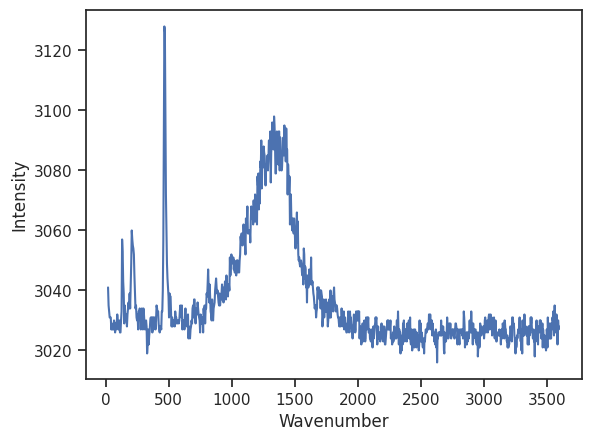

In [5]:
sns.lineplot(x = "Wavenumber", y = "Intensity", data = qtz_data)

Figure 1 - Raman microscope (50X) spectrum of standard single crystal quartz using 1.3 mW at 532 nm and 1 sec integration on the new kymera 328i 600 gv/mm with a center position of 2000 cm$^{-1}$.  The new iDus DD detector was at -95$^o$C and the spectrum was collected polarized. This data is on the YargerLab public GitHub repo (2025_03_14_Qtz_Std_Green_50X_n95C_Kymera328_1p3mW_2000wn_1sec_1accum_Pol.csv)

I collected two different quartz standard samples and background spectra, as well as spectra of CCl$_4$, and ALL show this broad 'peak' betwen 1000-2000 cm$^{-1}$.  This is the second 'issue' I had when testing out the new Raman system and this is another major issue that needs to be resolved or figured out before I can use the system for research.

For illustration, I will show some of the other spectra collected below.

## Raman Spectra of Standard Quartz Sample

One qtz sample shown, but I actually ran two different pieces of qtz to make sure it wasn't the sample.  Both looked the same as shown below

In [7]:
#Read in data sets from YargerLab GitHub
qtz_unpol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Qtz_New_Std_Green_50X_n95C_Kymera328_1p3mW_2000wn_10sec_1accum_UnPol.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')
qtz_pol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Qtz_New_Std_Green_50X_n95C_Kymera328_1p3mW_2000wn_10sec_1accum_Pol_2.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')
qtz_depol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Qtz_New_Std_Green_50X_n95C_Kymera328_1p3mW_2000wn_10sec_1accum_DePol_2.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')

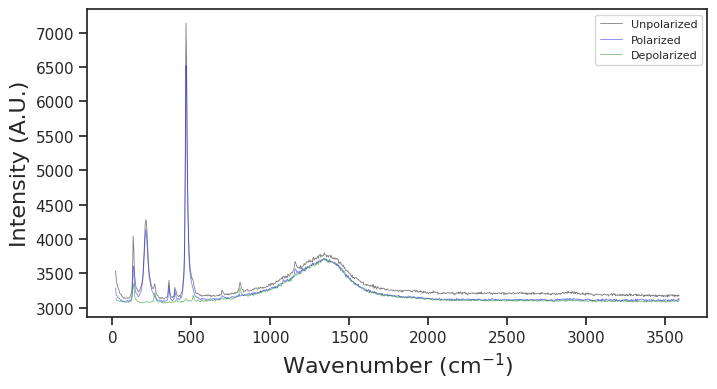

In [12]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots(figsize=(8, 4))
# Set general font size
plt.rcParams['font.size'] = '12'

#plot data
ax.plot(qtz_unpol_10s_data['Wavenumber'], qtz_unpol_10s_data['Intensity'], linewidth=0.6, color = 'Black', alpha=0.5, label = 'Unpolarized')
ax.plot(qtz_pol_10s_data['Wavenumber'], qtz_pol_10s_data['Intensity'], linewidth=0.6, color = 'Blue', alpha=0.5, label = 'Polarized')
ax.plot(qtz_depol_10s_data['Wavenumber'], qtz_depol_10s_data['Intensity'], linewidth=0.6, color = 'Green', alpha=0.5, label = 'Depolarized')
#define the limits and labels for the plot
plt.xlabel("Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel("Intensity (A.U.)", fontsize=16)

plt.legend(fontsize='8', loc='upper right')

Figure 2 - Raman microscope (50X) spectra of standard single crystal quartz using 1.3 mW at 532 nm and 10 sec integration on the new kymera 328i 600 gv/mm with a center position of 2000 cm$^{-1}$.  The new iDus DD detector was at -95$^o$C and the spectrum was collected unpolarized, depolarized and polarized. This data is on the YargerLab public GitHub repo (2025_03_14).

## Background Raman Spectra

To further try and figure out what this broad 'peak' is coming from, I ran background Raman with the laser on and just moved the sample out of the beam and with the laser off.  Both still showed this broad 'peak'.

In [13]:
#Read in data sets from YargerLab GitHub
bkgrd_air_unpol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Air_Background_Green_50X_n95C_Kymera328_0mW_2000wn_10sec_1accum_UnPol.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')
bkgrd_air_pol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Air_Background_Green_50X_n95C_Kymera328_1p3mW_2000wn_10sec_1accum_Pol.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')
bkgrd_air_depol_10s_data = pd.read_csv('https://raw.githubusercontent.com/yargerlab/Data/refs/heads/main/Raman/2025_03_14/2025_03_14_Air_Background_Green_50X_n95C_Kymera328_1p3mW_2000wn_10sec_1accum_DePol.csv',sep=',', names=['Wavenumber', 'Intensity'], header=None, encoding='latin-1')

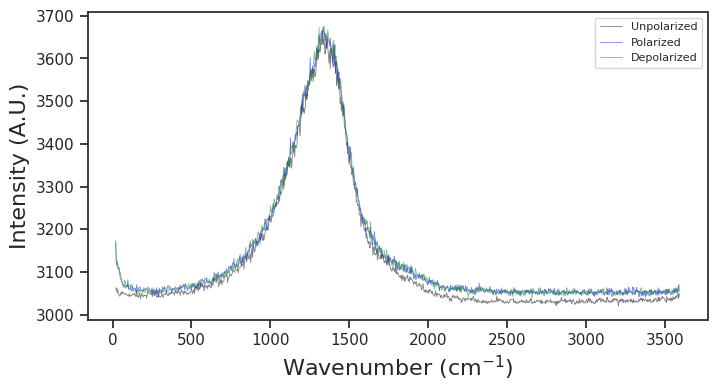

In [14]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots(figsize=(8, 4))
# Set general font size
plt.rcParams['font.size'] = '12'

#plot data
ax.plot(bkgrd_air_unpol_10s_data['Wavenumber'], bkgrd_air_unpol_10s_data['Intensity'], linewidth=0.6, color = 'Black', alpha=0.5, label = 'Unpolarized')
ax.plot(bkgrd_air_pol_10s_data['Wavenumber'], bkgrd_air_pol_10s_data['Intensity'], linewidth=0.6, color = 'Blue', alpha=0.5, label = 'Polarized')
ax.plot(bkgrd_air_depol_10s_data['Wavenumber'], bkgrd_air_depol_10s_data['Intensity'], linewidth=0.6, color = 'Green', alpha=0.5, label = 'Depolarized')
#define the limits and labels for the plot
plt.xlabel("Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel("Intensity (A.U.)", fontsize=16)

plt.legend(fontsize='8', loc='upper right')

Figure 3 - Raman microscope (50X) spectra of 'air' (no sample in focus of laser) using 1.3 mW at 532 nm and 10 sec integration on the new kymera 328i 600 gv/mm with a center position of 2000 cm$^{-1}$.  The new iDus DD detector was at -95$^o$C and the spectrum was collected unpolarized, depolarized and polarized. This data is on the YargerLab public GitHub repo (2025_03_14).